In [12]:
import pandas as pd;
import numpy as np

In [2]:
car_sales = pd.read_csv('cleanData/car_sales_clean.csv')
elevation = pd.read_csv('cleanData/elevationClean.csv')
gdp = pd.read_csv('cleanData/gdpClean.csv')
used_car = pd.read_csv('cleanData/used_car_clean.csv')
state = pd.read_csv('rawData/50_us_states_all_data (1).csv')
state.drop(state.columns[0],axis=1,inplace=True)
state.drop(state.columns[2],axis=1,inplace=True)
finalData = elevation.merge(state, how='inner', left_on='State', right_on='StateName').drop('StateName', axis=1)
finalData = finalData.merge(gdp, how='inner', left_on='State', right_on='GeoName').drop('GeoName', axis=1)
#finalData = used_car.merge(finalData, how='inner', left_on='State', right_on='StateAggre')
finalData = finalData[finalData.ComponentName == 'Gross domestic product (GDP) by state (millions of current dollars)']
finalData = finalData.drop('ComponentName', axis=1)
finalData = finalData.drop('Description', axis=1)
finalData.drop(finalData.columns[0],axis=1,inplace=True)
#used_car = used_car.merge(car_sales, how='left', left_on='Model', right_on='Model')
#for index,car in car_sales.iterrows():
   # carMake = car['Make'].strip()
    #if used_car['Make'].str.contains(carMake).any():
    #    carMakeModel = car_sales.loc[car_sales['Make'] == carMake]
    #    print('g')
    #    print(carMakeModel)
      #  pat = '|'.join(r"{}".format(x) for x in car['Make'])
     #   used_car['Test3'] = used_car['Make'].str.extract('('+ pat + ')', expand=False)
        #DF = pd.merge(DF1, DF2, left_on= 'Test1', right_on='Test3').drop('Test3', axis=1)
#finalData = finalData.groupby('StateAggre')
#finalData.sum()


In [3]:
#Select target state
used_car['State'] = used_car['State'].str.upper()
used_carGrouped = used_car.groupby('State')
#used_carGrouped.size().sort_values(ascending=False)

In [4]:
#Select taget Model
used_car['Model'] = used_car['Model'].str.upper()
used_car['Make'] = used_car['Make'].str.upper()
used_carGrouped = used_car.groupby(['Make','Model'])
used_carGrouped.size().sort_values(ascending=False)

Make        Model           
CHEVROLET   SILVERADO           10932
NISSAN      ALTIMA2.5            5080
GMC         SIERRA               4950
JEEP        GRAND                4810
HONDA       ACCORD               4430
FORD        F-1504WD             4004
JEEP        WRANGLER             3506
HONDA       CIVIC                3460
BMW         3                    3325
VOLKSWAGEN  JETTA                3138
HYUNDAI     SANTA                2992
FORD        FUSIONSE             2953
CHEVROLET   EQUINOXFWD           2854
DODGE       GRAND                2510
TOYOTA      CAMRYSE              2348
FORD        SUPER                2300
TOYOTA      COROLLALE            2292
CHEVROLET   MALIBULT             2268
FORD        F-150XLT             1923
LAND        ROVER                1892
CHRYSLER    TOWN                 1860
CHEVROLET   CAMAROCOUPE          1730
DODGE       RAM                  1725
MINI        COOPER               1693
HYUNDAI     SONATA2.4L           1640
BMW         5        

In [5]:
WAUsedCar = used_car[used_car['State'].str.contains('WA')]
WAUsedCar['City'] = WAUsedCar['City'].str.upper()
WAUsedCarGrouped = WAUsedCar.groupby('City')
WAUsedCarGrouped.size().sort_values(ascending=False)

/Users/ZhuoShan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


City
PUYALLUP          1195
TACOMA            1063
SEATTLE            676
BELLEVUE           566
SPOKANE            499
LYNNWOOD           450
EVERETT            410
LAKEWOOD           350
OLYMPIA            341
AUBURN             316
RENTON             308
KIRKLAND           278
BREMERTON          260
BELLINGHAM         252
EDMONDS            226
VANCOUVER          207
BURIEN             166
SHORELINE          149
SPOKANE VALLEY     146
MARYSVILLE         133
FIFE               129
CHEHALIS           124
FEDERAL WAY        110
TURNWATER          103
KENNEWICK           99
BURLINGTON          95
MOUNT VERNON        82
PORT ORCHARD        81
ISSAQUAH            80
YAKIMA              73
SUMNER              73
WOODINVILLE         61
LONGVIEW            56
WALLA WALLA         53
TUKWILA             52
WENATCHEE           49
COLVILLE            48
ELLENSBURG          46
LIBERTY LAKE        45
EAST WENATCHEE      42
MONROE              40
MCKENNA             39
BOTHELL             38
WASHOU

In [6]:
searchFor = ['SEATTLE', 'TACOMA','BELLEVUE']
bigSeattleUsedCar = WAUsedCar[WAUsedCar.City.str.contains('|'.join(searchFor))]

In [12]:
bigSeattleUsedCar
bigSeattleUsedCar.groupby(['Make','Model']).size().sort_values(ascending=False)

Make           Model            
BMW            3                    50
Chevrolet      Silverado            39
Honda          Accord               29
Lexus          RX                   28
Honda          Civic                26
Ford           F-1504WD             24
Volkswagen     Jetta                24
Jeep           Grand                22
Mercedes-Benz  C-ClassC             21
Land           Rover                21
MINI           Cooper               19
GMC            Sierra               18
Nissan         Altima2.5            18
Dodge          Ram                  16
Jeep           Wrangler             15
Lexus          ES                   15
BMW            i3Hatchback          15
               5                    15
Lexus          IS                   14
Ford           Super                14
BMW            4                    14
Ford           FocusHatchback       13
Volkswagen     Golf                 13
Mazda          Mazda3i              13
Chrysler       Town            

In [28]:
used_car_copy = used_car.copy()

In [29]:
used_car_copy['Original Price'] = 0

In [33]:
#Add Original Price and Vehicle type to SUV
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'GRAND'), 'Original Price'] = 31695
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'GRAND'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'WRANGLER'), 'Original Price'] = 28045
used_car_copy.loc[(used_car_copy.Make == 'JEEP') & (used_car_copy.Model == 'WRANGLER'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'EQUINOXFWD'), 'Original Price'] = 31000
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'EQUINOXFWD'), 'Vehicle Type'] = 'SUV'
used_car_copy.loc[(used_car_copy.Make == 'HYUNDAI') & (used_car_copy.Model == 'SANTA'), 'Original Price'] = 29800
used_car_copy.loc[(used_car_copy.Make == 'HYUNDAI') & (used_car_copy.Model == 'SANTA'), 'Vehicle Type'] = 'SUV'

In [43]:
#Add Original Price and Vehicle type to Sedan
used_car_copy.loc[(used_car_copy.Make == 'NISSAN') & (used_car_copy.Model == 'ALTIMA2.5'), 'Original Price'] = 31780
used_car_copy.loc[(used_car_copy.Make == 'NISSAN') & (used_car_copy.Model == 'ALTIMA2.5'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'HONDA') & (used_car_copy.Model == 'ACCORD'), 'Original Price'] = 27470
used_car_copy.loc[(used_car_copy.Make == 'HONDA') & (used_car_copy.Model == 'ACCORD'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'BMW') & (used_car_copy.Model == '3'), 'Original Price'] = 45000
used_car_copy.loc[(used_car_copy.Make == 'BMW') & (used_car_copy.Model == '3'), 'Vehicle Type'] = 'Sedan'
used_car_copy.loc[(used_car_copy.Make == 'VOLKSWAGEN') & (used_car_copy.Model == 'JETTA'), 'Original Price'] = 24500
used_car_copy.loc[(used_car_copy.Make == 'VOLKSWAGEN') & (used_car_copy.Model == 'JETTA'), 'Vehicle Type'] = 'Sedan'


In [44]:
#Add Original Price and Vehicle type to Truck
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'SILVERADO'), 'Original Price'] = 38200
used_car_copy.loc[(used_car_copy.Make == 'CHEVROLET') & (used_car_copy.Model == 'SILVERADO'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'GMC') & (used_car_copy.Model == 'SIERRA'), 'Original Price'] = 35900
used_car_copy.loc[(used_car_copy.Make == 'GMC') & (used_car_copy.Model == 'SIERRA'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'F-1504WD'), 'Original Price'] = 34695
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'F-1504WD'), 'Vehicle Type'] = 'Truck'
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'SUPER'), 'Original Price'] = 33150
used_car_copy.loc[(used_car_copy.Make == 'FORD') & (used_car_copy.Model == 'SUPER'), 'Vehicle Type'] = 'Truck'

In [51]:
#Group by vehicle type
used_car_copy['Model'] = used_car_copy['Model'].str.upper()
used_car_copy['Make'] = used_car_copy['Make'].str.upper()
used_carGrouped = used_car_copy.groupby(['Vehicle Type'])
used_carGrouped.size().sort_values(ascending=False)

Vehicle Type
Truck    22186
Sedan    15973
SUV      14162
dtype: int64

In [46]:
&car_sales['depreciationRate'] = car_sales['4-year resale value']/car_sales['Price']
import matplotlib.pyplot as plt
plt.figure()
plt.hist(car_sales['depreciationRate'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-5676088bcb09>, line 1)

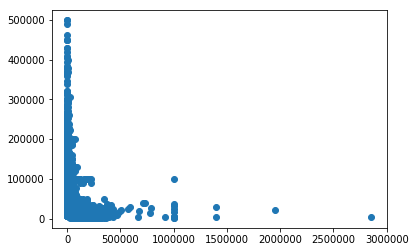

In [27]:
plt.figure()
plt.scatter(used_car['Mileage'],used_car['Price'])
plt.show()

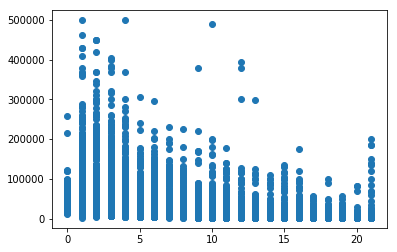

In [29]:
plt.figure()
plt.scatter(2018-used_car['Year'],used_car['Price'])
plt.show()